In [2]:
import pandas as pd

file_path = 'Data/data.csv'

df = pd.read_csv(file_path, encoding='latin1')

print("Dataset ka shape:", df.shape)
df.head()


Dataset ka shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Missing values check karte hain
missing = df.isnull().sum()
print("Missing values har column me:")
print(missing)


Missing values har column me:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# Data types check karte hain
print("\nColumns ke data types:")
print(df.dtypes)



Columns ke data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [5]:
# Statistical summary
print("\nData ka statistical summary:")
print(df.describe())



Data ka statistical summary:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [9]:
# Description me missing fill karna
df['Description'] = df['Description'].fillna('Unknown')


# Missing CustomerID wali rows drop karna
df = df.dropna(subset=['CustomerID'])

print("Missing values ab:")
print(df.isnull().sum())


Missing values ab:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
# Quantity aur UnitPrice me se negative aur zero values remove karna
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print("Data shape after cleaning:", df.shape)


Data shape after cleaning: (397884, 8)


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df['InvoiceDate'].head())


0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [11]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [12]:
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print(country_sales.head(10))


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalSales, dtype: float64


C:\Users\HS COMPUTER S HYD\AppData\Local\Temp\ipykernel_9556\485425948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette='viridis')


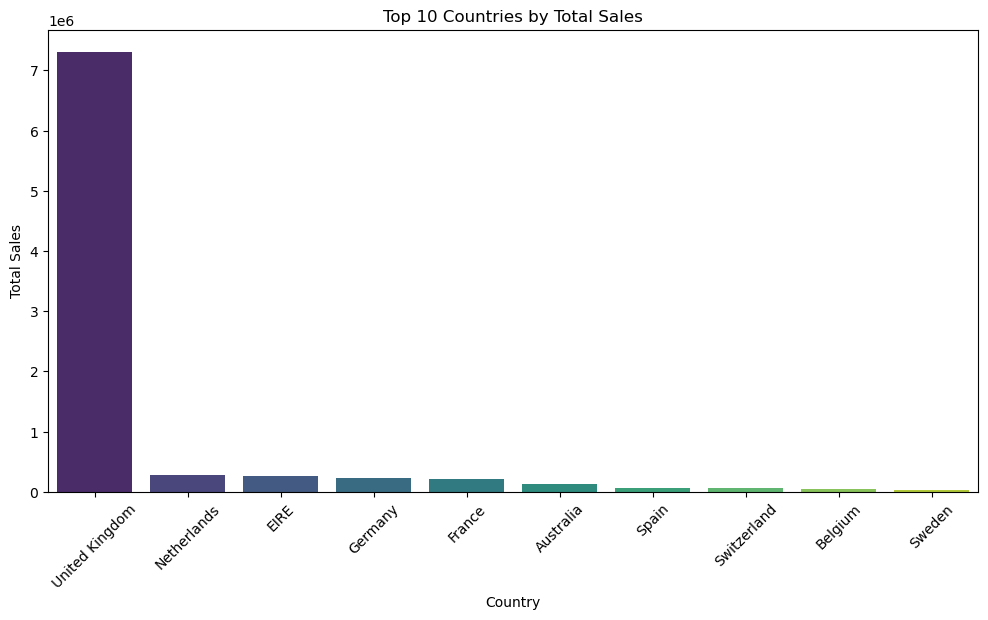

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index[:10], y=country_sales.values[:10], palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [16]:
daily_sales = df.groupby('InvoiceDate')['TotalSales'].sum()


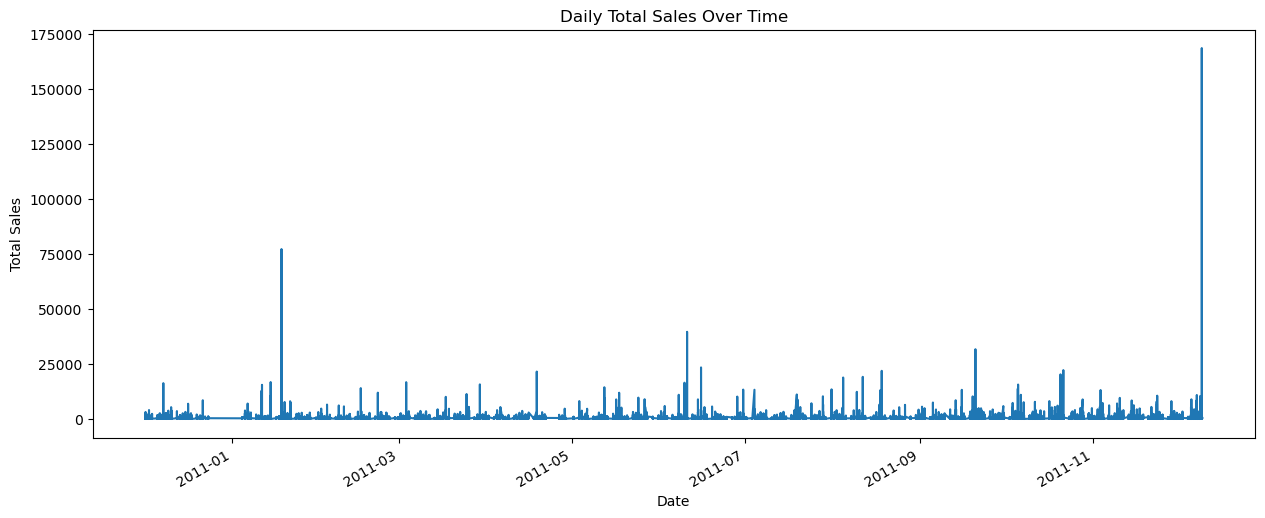

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
daily_sales.plot()
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [19]:
monthly_sales = daily_sales.resample('ME').sum()



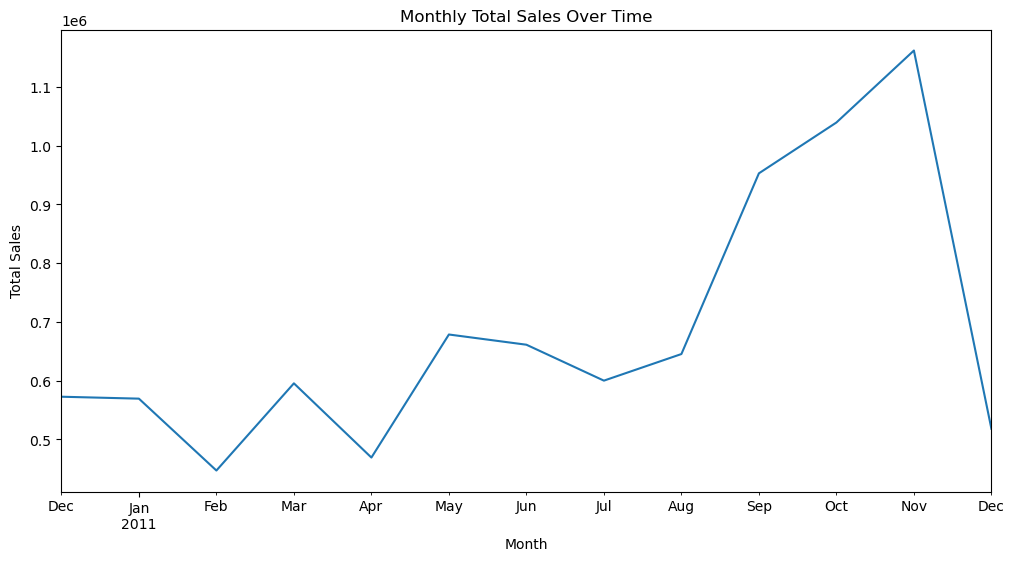

In [20]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [21]:
!pip install prophet --quiet


In [22]:
from prophet import Prophet

# Data prepare karo
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_df.head()


,ds,y
0,2010-12-31,572713.890
1,2011-01-31,569445.040
2,2011-02-28,447137.350
3,2011-03-31,595500.760
4,2011-04-30,469200.361


In [23]:
m = Prophet()
m.fit(prophet_df)

# Future dates create karo (next 6 months)
future = m.make_future_dataframe(periods=6, freq='M')

# Forecast karo
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


11:30:45 - cmdstanpy - INFO - Chain [1] start processing
11:30:46 - cmdstanpy - INFO - Chain [1] done processing
D:\anaconda01\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
14,2012-02-29,9.653544e+05,755109.762577,1.197931e+06
15,2012-03-31,1.001040e+06,801362.268737,1.221139e+06
16,2012-04-30,1.035575e+06,810324.892940,1.240023e+06
17,2012-05-31,1.071261e+06,851831.899466,1.285066e+06
18,2012-06-30,1.105795e+06,879234.917578,1.315357e+06


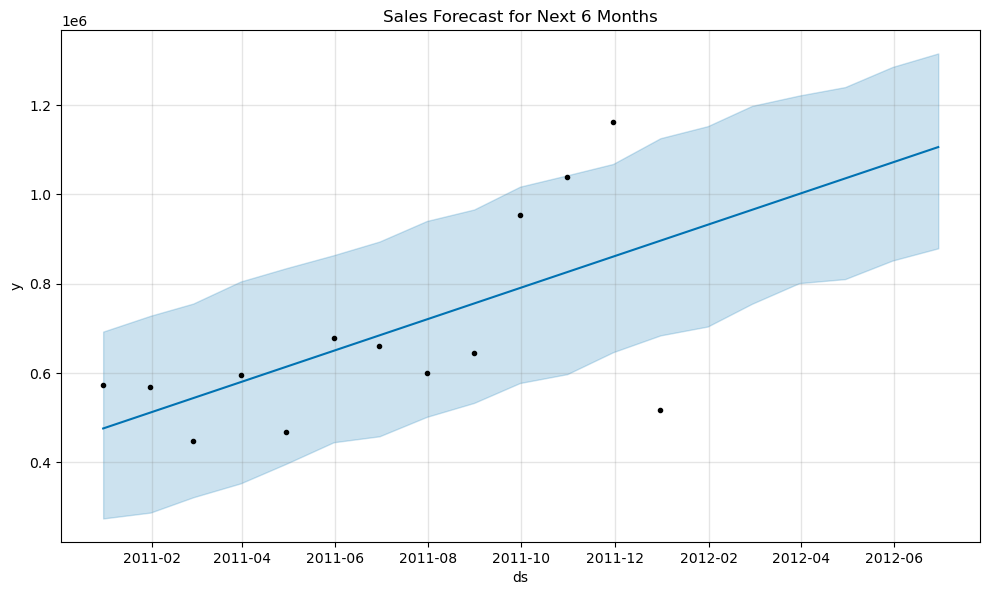

In [24]:
m.plot(forecast)
plt.title('Sales Forecast for Next 6 Months')
plt.show()


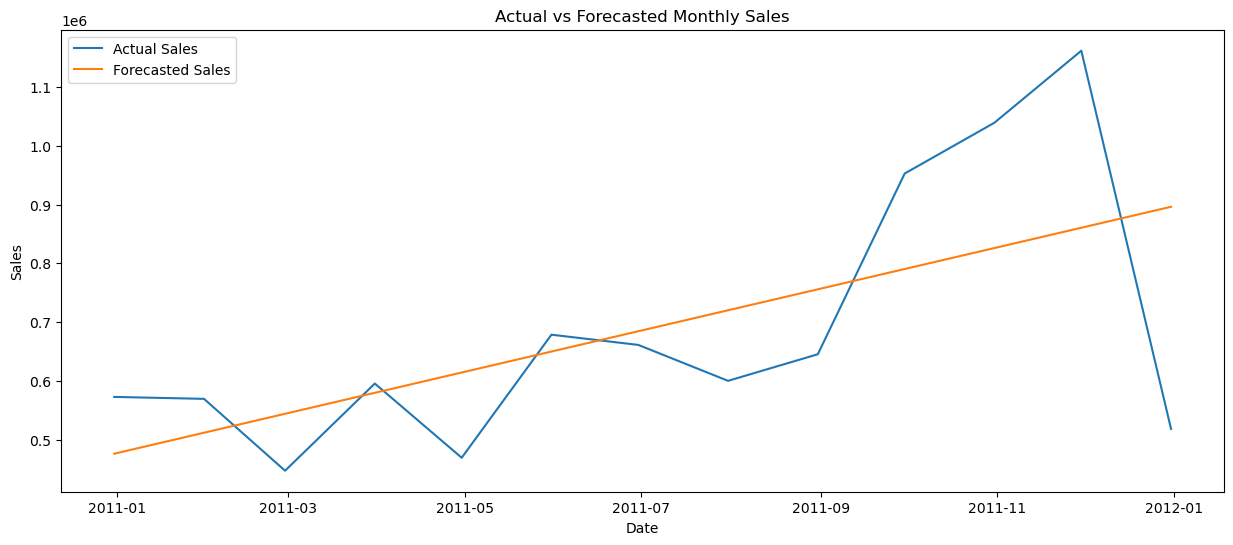

In [25]:
plt.figure(figsize=(15,6))

# Actual monthly sales
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Sales')

# Forecasted sales (yhat) sirf original data tak plot karo
plt.plot(forecast['ds'][:len(prophet_df)], forecast['yhat'][:len(prophet_df)], label='Forecasted Sales')

plt.title('Actual vs Forecasted Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(prophet_df['y'], forecast['yhat'][:len(prophet_df)])
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 134575.56


In [27]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


C:\Users\HS COMPUTER S HYD\AppData\Local\Temp\ipykernel_9556\1696901652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


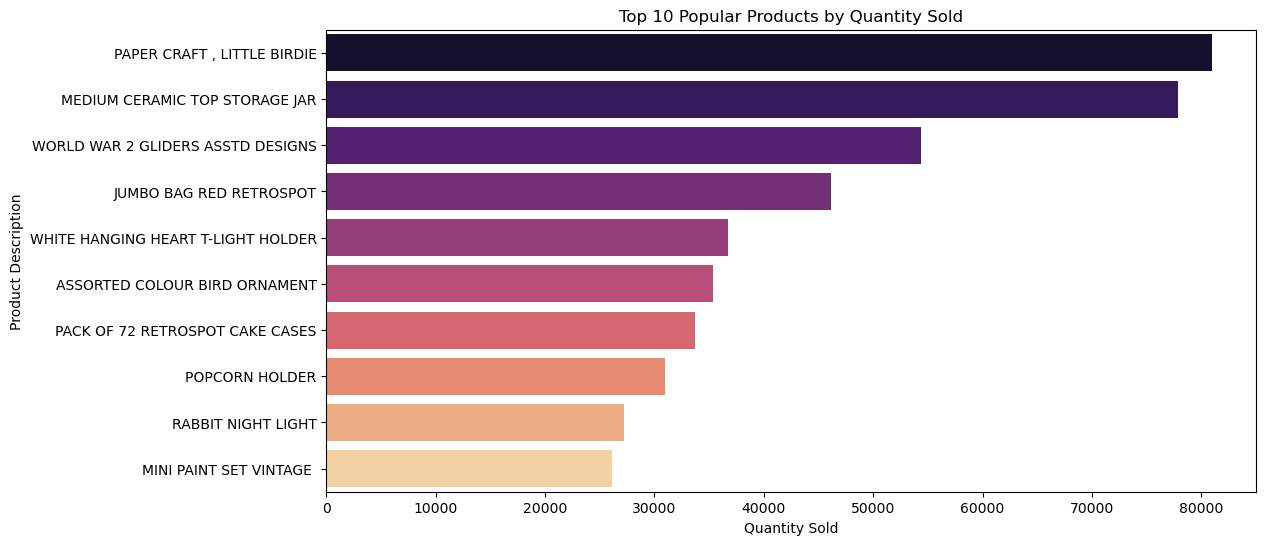

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Popular Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()


In [29]:
!pip install streamlit --quiet
